<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_model_selection/howmanyclustersIris_Raiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
diris = sns.load_dataset("iris")
diris.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
diris.shape

(150, 5)

In [5]:
diris.nonans= diris.dropna ()
diris_num= diris.nonans.select_dtypes ('number')
diris_num.head ()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
diris_num.shape

(150, 4)

In [7]:
diris.nonans.shape

(150, 5)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture



NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(diris_num)
    bic.append(gmm.bic(diris_num))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(diris_num)



[702.2248393084592]
[702.2248393084592, -1162.4983028557272]
[702.2248393084592, -1162.4983028557272, -1125.5941636968867]
[702.2248393084592, -1162.4983028557272, -1125.5941636968867, -1050.948535721482]
[702.2248393084592, -1162.4983028557272, -1125.5941636968867, -1050.948535721482, -976.2367282950232]
[702.2248393084592, -1162.4983028557272, -1125.5941636968867, -1050.948535721482, -976.2367282950232, -890.1129223363462]
[702.2248393084592, -1162.4983028557272, -1125.5941636968867, -1050.948535721482, -976.2367282950232, -890.1129223363462, -797.2676227671282]
[702.2248393084592, -1162.4983028557272, -1125.5941636968867, -1050.948535721482, -976.2367282950232, -890.1129223363462, -797.2676227671282, -802.5784686543758]
[702.2248393084592, -1162.4983028557272, -1125.5941636968867, -1050.948535721482, -976.2367282950232, -890.1129223363462, -797.2676227671282, -802.5784686543758, -651.0031430748966]
[702.2248393084592, -1162.4983028557272, -1125.5941636968867, -1050.948535721482, -97

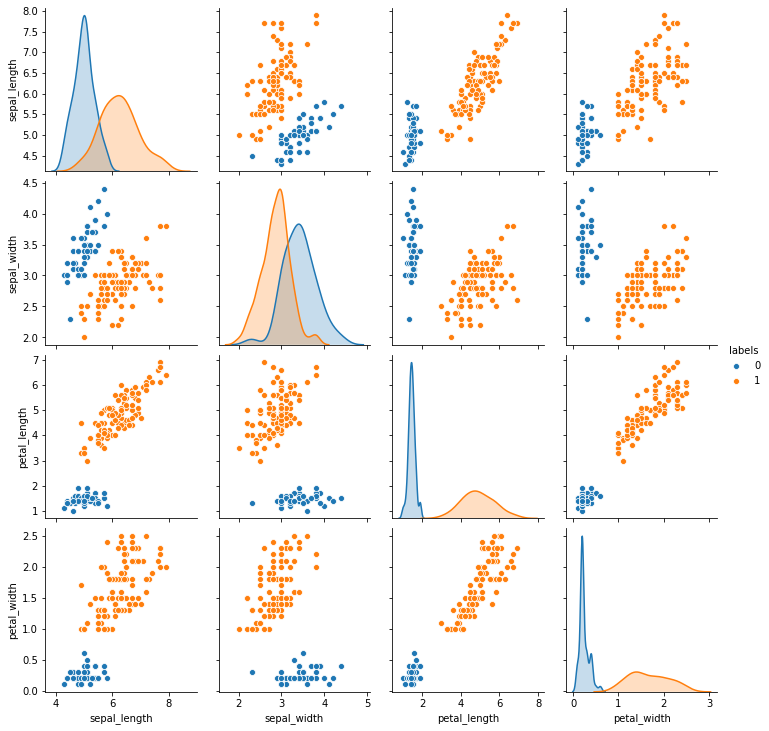

In [14]:
diris_num ['labels'] = gmm.predict(diris_num)
g = sns.pairplot (diris_num, hue='labels')